# Grid Dataset Visualization

This notebook aims at analysing and visualising the key aspect of the data.

In [1]:
import grid2op
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from lightsim2grid import LightSimBackend

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

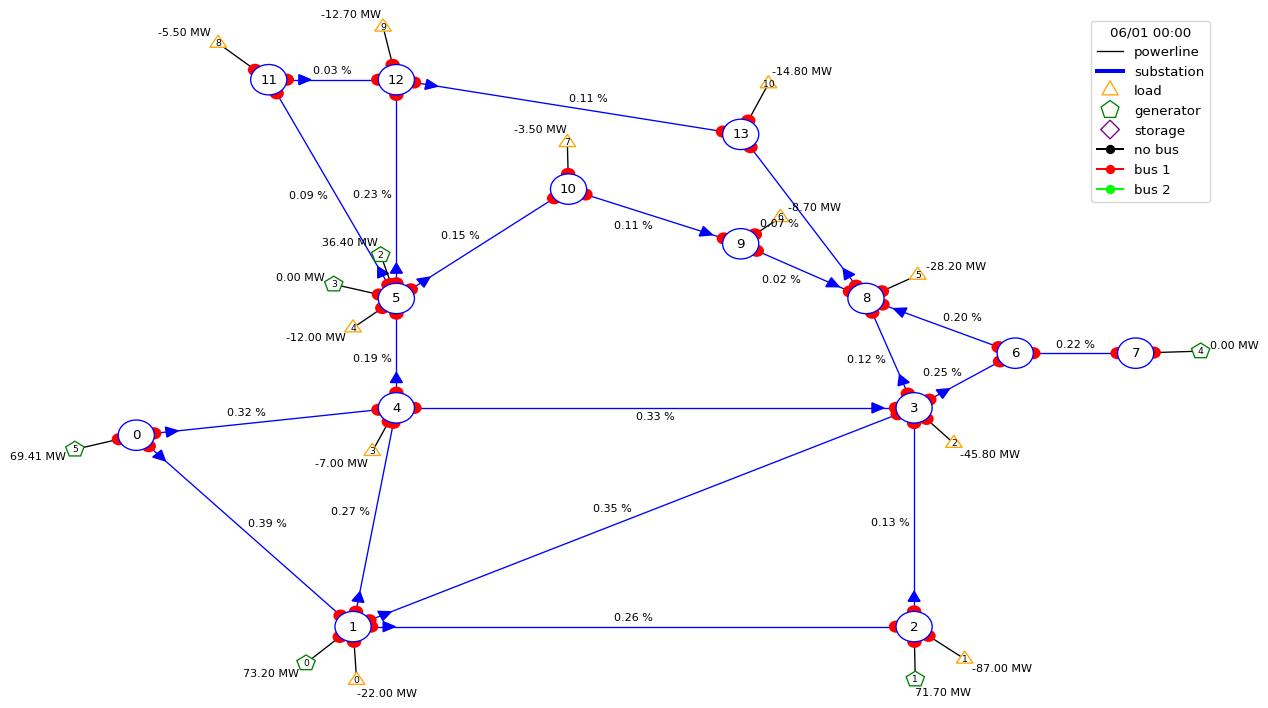

In [2]:
env = grid2op.make("l2rpn_case14_sandbox", backend=LightSimBackend(), n_busbar=3)
env.render()

From the plot of the environment, we can note that there are:
- 6 generators (len of the narray `gen_p` and `gen_q`)
- 11 loads (len of the narray `load_p` and `load_q`)
- 57 buses 1 (len of the narray `topo_vect`)
- 20 lines/connections (len of the narray `rho`)

## 1. Analysis of the data

As a reminder:
- `n_episodes = 2`: there are 2 different scenarios (i.e. two different forecasts)
- `n_actions = 100`: number of possible actions
- `rho`: how much the lines are loaded, between 0 and +inf but should be below 1 in normal operations
- `targets`: max rho on the lines after an action has been played for each observation

In [3]:
df_targets = pl.read_parquet("data/raw/df_targets.parquet")
df_features = pl.read_parquet("data/raw/df_features.parquet")

In [4]:
df_features

gen_p1,gen_p2,gen_p3,gen_p4,gen_p5,gen_p6,gen_q1,gen_q2,gen_q3,gen_q4,gen_q5,gen_q6,load_p1,load_p2,load_p3,load_p4,load_p5,load_p6,load_p7,load_p8,load_p9,load_p10,load_p11,load_q1,load_q2,load_q3,load_q4,load_q5,load_q6,load_q7,load_q8,load_q9,load_q10,load_q11,topo_vect1,topo_vect2,topo_vect3,…,topo_vect41,topo_vect42,topo_vect43,topo_vect44,topo_vect45,topo_vect46,topo_vect47,topo_vect48,topo_vect49,topo_vect50,topo_vect51,topo_vect52,topo_vect53,topo_vect54,topo_vect55,topo_vect56,topo_vect57,rho1,rho2,rho3,rho4,rho5,rho6,rho7,rho8,rho9,rho10,rho11,rho12,rho13,rho14,rho15,rho16,rho17,rho18,rho19,rho20
f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i32,i32,i32,…,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
81.400002,79.300003,5.3,0.0,0.0,82.246674,19.496038,71.340233,24.368923,24.368923,24.01807,-17.27466,21.9,85.800003,44.299999,6.9,11.9,28.5,8.8,3.5,5.4,12.6,14.4,15.4,59.700001,30.799999,4.8,8.3,19.4,6.1,2.4,3.9,8.8,10.5,1,1,1,…,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.34013,0.360423,0.272101,0.267226,0.828129,0.269201,0.343346,0.531516,0.495164,0.731675,0.288539,0.382659,0.289275,0.431878,0.396449,0.544602,0.533467,0.924473,0.453396,0.46154
82.5,80.699997,5.3,0.0,0.0,80.113495,19.162947,71.243042,24.402109,24.402109,24.112627,-16.656225,22.0,85.699997,44.900002,6.8,11.7,28.1,8.8,3.4,5.4,12.9,14.7,15.4,60.0,30.9,4.8,8.2,19.700001,6.1,2.5,3.8,8.9,10.3,1,1,1,…,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.326746,0.356591,0.263959,0.267204,0.829614,0.278238,0.340316,0.533229,0.496741,0.738767,0.290505,0.390571,0.29017,0.447009,0.396498,0.54363,0.531994,0.925324,0.455181,0.46067
82.699997,81.599998,5.4,0.0,0.0,79.293762,19.233862,72.06739,24.604052,24.604052,24.333878,-16.379263,22.0,86.300003,44.799999,7.0,11.7,28.0,8.8,3.5,5.5,12.4,14.8,15.4,60.799999,31.200001,4.9,8.3,20.0,6.3,2.4,3.8,8.9,10.5,1,1,1,…,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.322066,0.354571,0.26173,0.266428,0.828156,0.280012,0.337524,0.53956,0.498101,0.73516,0.289035,0.389768,0.296073,0.438327,0.405533,0.54143,0.529341,0.920692,0.459357,0.460031
81.199997,81.699997,5.5,0.0,0.0,83.309692,20.089237,72.811249,24.32811,24.32811,24.152327,-17.444201,22.0,88.099998,45.0,6.9,11.8,28.5,8.7,3.5,5.5,12.5,14.9,15.5,61.0,31.299999,4.8,8.3,19.5,6.2,2.4,3.8,8.7,10.3,1,1,1,…,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.346037,0.363183,0.27291,0.26872,0.831273,0.27232,0.348628,0.534556,0.496473,0.732376,0.277777,0.390334,0.291495,0.432514,0.402103,0.546279,0.534865,0.92548,0.45593,0.462792
83.099998,81.900002,5.7,0.0,0.0,81.110779,19.422855,73.018944,24.461641,24.461641,24.407396,-16.756819,22.0,87.300003,45.400002,6.9,11.8,28.5,8.8,3.4,5.5,12.8,15.1,15.3,61.400002,31.299999,4.8,8.0,20.1,6.1,2.4,3.9,8.8,10.4,1,1,1,…,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.331326,0.360288,0.268568,0.269959,0.837161,0.279832,0.346156,0.538806,0.50282,0.744448,0.283771,0.396378,0.296749,0.441963,0.4073,0.547093,0.536196,0.929695,0.460745,0.465798
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
69.400002,68.0,58.299999,13.8,9.1,67.357483,18.734512,94.039207,22.052109,22.052109,26.56752,-16.967211,22.700001,105.0,49.599998,8.2,11.6,31.4,10.3,4.1,7.0,15.6,16.299999,15.6,73.400002,35.200001,5.9,8.3,21.5,7.0,2.8,5.0,10.8,11.1,1,1,1,…,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.319332,0.250312,0.380039,0.19808,0.493211,0.204621,0.514898,0.915902,0.653262,0.998941,0.423748,0.305648,0.562604,0.622646,0.622266,0.298271,0.274628,0.115118,0.530127,0.398827
70.300003,67.099998,58.099998,14.9,9.5,62.906563,17.542288,93.835938,21.80135,21.80135,26.625813,-15.971437,22.299999,103.400002,49.200001,8.1,11.7,31.6,10.1,4.0,7.0,15.4,16.0,15.6,73.699997,34.599998,5.7,8.1,21.9,7.1,2.8,4.9,10.6,11.3,1,1,1,…,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.294404,0.238906,0.3725

In [5]:
df_features.null_count()

gen_p1,gen_p2,gen_p3,gen_p4,gen_p5,gen_p6,gen_q1,gen_q2,gen_q3,gen_q4,gen_q5,gen_q6,load_p1,load_p2,load_p3,load_p4,load_p5,load_p6,load_p7,load_p8,load_p9,load_p10,load_p11,load_q1,load_q2,load_q3,load_q4,load_q5,load_q6,load_q7,load_q8,load_q9,load_q10,load_q11,topo_vect1,topo_vect2,topo_vect3,…,topo_vect41,topo_vect42,topo_vect43,topo_vect44,topo_vect45,topo_vect46,topo_vect47,topo_vect48,topo_vect49,topo_vect50,topo_vect51,topo_vect52,topo_vect53,topo_vect54,topo_vect55,topo_vect56,topo_vect57,rho1,rho2,rho3,rho4,rho5,rho6,rho7,rho8,rho9,rho10,rho11,rho12,rho13,rho14,rho15,rho16,rho17,rho18,rho19,rho20
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
is_infinite_features = df_features.select(pl.all().is_infinite())

has_any_true = (
    is_infinite_features
    .select(pl.any_horizontal(pl.all()).alias("row_has_true"))
    .select(pl.col("row_has_true").any())
    .item()  # now shape is (1, 1)
)
print(f"Does df_features contains any infinite value? {"YES" if has_any_true else "NO"}")

Does df_features contains any infinite value? NO


In [7]:
df_targets

action_0,action_1,action_2,action_3,action_4,action_5,action_6,action_7,action_8,action_9,action_10,action_11,action_12,action_13,action_14,action_15,action_16,action_17,action_18,action_19,action_20,action_21,action_22,action_23,action_24,action_25,action_26,action_27,action_28,action_29,action_30,action_31,action_32,action_33,action_34,action_35,action_36,…,action_64,action_65,action_66,action_67,action_68,action_69,action_70,action_71,action_72,action_73,action_74,action_75,action_76,action_77,action_78,action_79,action_80,action_81,action_82,action_83,action_84,action_85,action_86,action_87,action_88,action_89,action_90,action_91,action_92,action_93,action_94,action_95,action_96,action_97,action_98,action_99,action_100
f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0.991759,1.024799,inf,2.921079,0.922037,0.922037,0.92252,0.925332,0.951399,1.252364,0.924473,0.924444,inf,1.968653,inf,0.924295,inf,1.223919,0.991759,1.024799,0.92417,1.280081,1.264331,inf,0.924473,0.951399,inf,0.924504,0.924473,0.969826,0.957245,1.024799,0.872539,0.927711,1.252364,0.924331,0.924473,…,0.924473,1.07932,0.921487,0.928356,inf,0.861882,0.924374,0.924473,0.924473,0.924672,0.957245,1.223919,0.924473,0.924582,1.252364,0.957245,0.921189,0.925553,0.924473,1.07932,inf,1.157421,0.951399,2.921079,0.872539,0.923208,0.969826,1.910263,0.924473,0.926466,inf,0.922037,1.954109,1.07932,2.921079,1.280081,0.924473
0.992912,1.029292,inf,2.963777,0.922793,0.922793,0.923378,0.92618,0.950245,1.252578,0.925324,0.925295,inf,1.972948,inf,0.925146,inf,1.223866,0.992912,1.029292,0.925022,1.276919,1.265776,inf,0.925324,0.950245,inf,0.925354,0.925324,0.97747,0.956519,1.029292,0.873741,0.92855,1.252578,0.925182,0.925324,…,0.925324,1.078207,0.922349,0.929193,inf,0.862217,0.925225,0.925324,0.925324,0.925522,0.956519,1.223866,0.925324,0.925432,1.252578,0.956519,0.922051,0.9264,0.925324,1.078207,inf,1.156169,0.950245,2.963777,0.873741,0.924064,0.977469,1.913983,0.925324,0.92731,inf,0.922793,1.95178,1.078207,2.963777,1.276919,0.925324
0.987906,1.024048,inf,2.937955,0.918325,0.918325,0.918749,0.921546,0.960046,1.247549,0.920692,0.920663,inf,1.962996,inf,0.920514,inf,1.218037,0.987906,1.024048,0.92039,1.272976,1.262959,inf,0.920692,0.960046,inf,0.920722,0.920692,0.976906,0.95134,1.024048,0.869084,0.923913,1.247549,0.92055,0.920692,…,0.920692,1.0716,0.917722,0.924554,inf,0.856194,0.920593,0.920692,0.920692,0.92089,0.95134,1.218037,0.920692,0.9208,1.247549,0.95134,0.917426,0.921766,0.920692,1.0716,inf,1.149423,0.960046,2.937955,0.869084,0.919434,0.976905,1.904173,0.920692,0.922674,inf,0.918325,1.943361,1.0716,2.937955,1.272976,0.920692
0.990192,1.029305,inf,2.92392,0.923055,0.923055,0.923526,0.92634,0.950215,1.25437,0.92548,0.925451,inf,1.959684,inf,0.925302,inf,1.225793,0.990192,1.029305,0.925177,1.286744,1.269944,inf,0.92548,0.950215,inf,0.925511,0.92548,0.974543,0.958971,1.029305,0.872761,0.92872,1.25437,0.925338,0.92548,…,0.92548,1.082343,0.922493,0.929365,inf,0.859997,0.925381,0.92548,0.92548,0.925679,0.958971,1.225793,0.92548,0.925589,1.25437,0.958971,0.922195,0.926561,0.92548,1.082343,inf,1.160419,0.950215,2.92392,0.872761,0.924215,0.974542,1.900401,0.92548,0.927474,inf,0.923055,1.957966,1.082343,2.92392,1.286744,0.92548
0.9949,1.035515,inf,2.978619,0.927164,0.927164,0.927746,0.930551,0.94729,1.26099,0.929695,0.929666,inf,1.975094,inf,0.929516,inf,1.231323,0.9949,1.035515,0.929392,1.289218,1.277865,inf,0.929695,0.94729,inf,0.929725,0.929695,0.985364,0.961445,1.035515,0.875924,0.932925,1.26099,0.929552,0.929695,…,0.929695,1.084825,0.926716,0.933568,inf,0.863703,0.929596,0.929695,0.929695,0.929893,0.961445,1.231323,0.929695,0.929804,1.26099,0.961445,0.926419,0.930772,0.929695,1.084825,inf,1.163564,0.94729,2.978619,0.875924,0.928433,0.9

In [8]:
is_infinite = df_targets.select(pl.all().is_infinite())

has_any_true = (
    is_infinite
    .select(pl.any_horizontal(pl.all()).alias("row_has_true"))
    .select(pl.col("row_has_true").any())
    .item()  # now shape is (1, 1)
)
print(f"Does df_targets contains any infinite value? {"YES" if has_any_true else "NO"}")

Does df_targets contains any infinite value? YES


In [9]:
analysis = is_infinite.select(
    [
        pl.when(pl.col(c).all())
        .then(pl.lit("Only inf values"))
        .when(pl.col(c).any().not_())
        .then(pl.lit("Only finite values"))
        .otherwise(pl.lit("Mixed"))
        .alias(c)
        for c in is_infinite.columns
    ]
)

In [10]:
analysis

action_0,action_1,action_2,action_3,action_4,action_5,action_6,action_7,action_8,action_9,action_10,action_11,action_12,action_13,action_14,action_15,action_16,action_17,action_18,action_19,action_20,action_21,action_22,action_23,action_24,action_25,action_26,action_27,action_28,action_29,action_30,action_31,action_32,action_33,action_34,action_35,action_36,…,action_64,action_65,action_66,action_67,action_68,action_69,action_70,action_71,action_72,action_73,action_74,action_75,action_76,action_77,action_78,action_79,action_80,action_81,action_82,action_83,action_84,action_85,action_86,action_87,action_88,action_89,action_90,action_91,action_92,action_93,action_94,action_95,action_96,action_97,action_98,action_99,action_100
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Only finite values""","""Only finite values""","""Only inf values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only inf values""","""Only finite values""","""Only inf values""","""Only finite values""","""Only inf values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only inf values""","""Only finite values""","""Only finite values""","""Only inf values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""",…,"""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only inf values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only inf values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only inf values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values""","""Only finite values"""


In [11]:
analysis.unpivot().get_column("value").value_counts()

value,count
str,u32
"""Only inf values""",11
"""Only finite values""",90


In [12]:
# find columns in `analysis` whose single value is "Mixed"
melted = analysis.unpivot()
mixed_cols = melted.filter(pl.col("value") == "Mixed").get_column("variable").to_list()

if mixed_cols:
    print("Columns with value 'Mixed':")
    for c in mixed_cols:
        print(c)
        print(f"There are {df_targets["action_30"].is_infinite().sum()} infinite values out of {len(df_targets)} in df_targets['{c}'] \n")
else:
    print("No columns with value 'Mixed' found.")

No columns with value 'Mixed' found.


There are either only infinite values or only finite values in an action column.

In [14]:
df_targets.null_count()

action_0,action_1,action_2,action_3,action_4,action_5,action_6,action_7,action_8,action_9,action_10,action_11,action_12,action_13,action_14,action_15,action_16,action_17,action_18,action_19,action_20,action_21,action_22,action_23,action_24,action_25,action_26,action_27,action_28,action_29,action_30,action_31,action_32,action_33,action_34,action_35,action_36,…,action_64,action_65,action_66,action_67,action_68,action_69,action_70,action_71,action_72,action_73,action_74,action_75,action_76,action_77,action_78,action_79,action_80,action_81,action_82,action_83,action_84,action_85,action_86,action_87,action_88,action_89,action_90,action_91,action_92,action_93,action_94,action_95,action_96,action_97,action_98,action_99,action_100
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Actions that led to inf values in the targets

In [15]:
actions_vectors = np.load("data/raw/all_actions.npy")
all_actions = [env.action_space.from_vect(vec) for vec in actions_vectors]

infinite_cols = []
for col in df_targets.columns:
    mask = df_targets.select(pl.col(col).is_infinite()).to_numpy()
    if mask.size and mask.all():
        infinite_cols.append(col)

for col in infinite_cols:
        idx = int(col.split("_")[1])
        print(f"{col}: {all_actions[idx]} \n")

action_2: This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 2 to line (extremity) id 2 [on substation 2]
	 - Disconnect the following element(s):
	 	 - Disconnect line (origin) id 5 [on substation 2] 

action_12: This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 1 to line (extremity) id 0 [on substation 1]
	 	 - Assign bus 2 to line (origin) id 2 [on substation 1]
	 	 - Assign bus 2 to line (origin) id 3 [on substation 1]
	 	 - Assi

In [16]:
df_targets.unpivot().filter(pl.col("value") != float('inf')).select(pl.col("value").max())

value
f32
4.120337


## 2. Analysis of the processed data and actions

In [17]:
df = pl.read_parquet("data/processed/dataset.parquet")

In [18]:
df

gen_p1,gen_p2,gen_p3,gen_p4,gen_p5,gen_p6,gen_q1,gen_q2,gen_q3,gen_q4,gen_q5,gen_q6,load_p1,load_p2,load_p3,load_p4,load_p5,load_p6,load_p7,load_p8,load_p9,load_p10,load_p11,load_q1,load_q2,load_q3,load_q4,load_q5,load_q6,load_q7,load_q8,load_q9,load_q10,load_q11,topo_vect1,topo_vect2,topo_vect3,…,action_64,action_65,action_66,action_67,action_68,action_69,action_70,action_71,action_72,action_73,action_74,action_75,action_76,action_77,action_78,action_79,action_80,action_81,action_82,action_83,action_84,action_85,action_86,action_87,action_88,action_89,action_90,action_91,action_92,action_93,action_94,action_95,action_96,action_97,action_98,action_99,action_100
f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i32,i32,i32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
81.400002,79.300003,5.3,0.0,0.0,82.246674,19.496038,71.340233,24.368923,24.368923,24.01807,-17.27466,21.9,85.800003,44.299999,6.9,11.9,28.5,8.8,3.5,5.4,12.6,14.4,15.4,59.700001,30.799999,4.8,8.3,19.4,6.1,2.4,3.9,8.8,10.5,1,1,1,…,0.924473,1.07932,0.921487,0.928356,9.120337,0.861882,0.924374,0.924473,0.924473,0.924672,0.957245,1.223919,0.924473,0.924582,1.252364,0.957245,0.921189,0.925553,0.924473,1.07932,9.120337,1.157421,0.951399,2.921079,0.872539,0.923208,0.969826,1.910263,0.924473,0.926466,9.120337,0.922037,1.954109,1.07932,2.921079,1.280081,0.924473
82.5,80.699997,5.3,0.0,0.0,80.113495,19.162947,71.243042,24.402109,24.402109,24.112627,-16.656225,22.0,85.699997,44.900002,6.8,11.7,28.1,8.8,3.4,5.4,12.9,14.7,15.4,60.0,30.9,4.8,8.2,19.700001,6.1,2.5,3.8,8.9,10.3,1,1,1,…,0.925324,1.078207,0.922349,0.929193,9.120337,0.862217,0.925225,0.925324,0.925324,0.925522,0.956519,1.223866,0.925324,0.925432,1.252578,0.956519,0.922051,0.9264,0.925324,1.078207,9.120337,1.156169,0.950245,2.963777,0.873741,0.924064,0.977469,1.913983,0.925324,0.92731,9.120337,0.922793,1.95178,1.078207,2.963777,1.276919,0.925324
82.699997,81.599998,5.4,0.0,0.0,79.293762,19.233862,72.06739,24.604052,24.604052,24.333878,-16.379263,22.0,86.300003,44.799999,7.0,11.7,28.0,8.8,3.5,5.5,12.4,14.8,15.4,60.799999,31.200001,4.9,8.3,20.0,6.3,2.4,3.8,8.9,10.5,1,1,1,…,0.920692,1.0716,0.917722,0.924554,9.120337,0.856194,0.920593,0.920692,0.920692,0.92089,0.95134,1.218037,0.920692,0.9208,1.247549,0.95134,0.917426,0.921766,0.920692,1.0716,9.120337,1.149423,0.960046,2.937955,0.869084,0.919434,0.976905,1.904173,0.920692,0.922674,9.120337,0.918325,1.943361,1.0716,2.937955,1.272976,0.920692
81.199997,81.699997,5.5,0.0,0.0,83.309692,20.089237,72.811249,24.32811,24.32811,24.152327,-17.444201,22.0,88.099998,45.0,6.9,11.8,28.5,8.7,3.5,5.5,12.5,14.9,15.5,61.0,31.299999,4.8,8.3,19.5,6.2,2.4,3.8,8.7,10.3,1,1,1,…,0.92548,1.082343,0.922493,0.929365,9.120337,0.859997,0.925381,0.92548,0.92548,0.925679,0.958971,1.225793,0.92548,0.925589,1.25437,0.958971,0.922195,0.926561,0.92548,1.082343,9.120337,1.160419,0.950215,2.92392,0.872761,0.924215,0.974542,1.900401,0.92548,0.927474,9.120337,0.923055,1.957966,1.082343,2.92392,1.286744,0.92548
83.099998,81.900002,5.7,0.0,0.0,81.110779,19.422855,73.018944,24.461641,24.461641,24.407396,-16.756819,22.0,87.300003,45.400002,6.9,11.8,28.5,8.8,3.4,5.5,12.8,15.1,15.3,61.400002,31.299999,4.8,8.0,20.1,6.1,2.4,3.9,8.8,10.4,1,1,1,…,0.929695,1.084825,0.926716,0.933568,9.120337,0.863703,0.929596,0.929695,0.929695,0.929893,0.961445,1.231323,0.929695,0.929804,1.26099,0.961445,0.926419,0.930772,0.929695,1.084825,9.120337,1.163564,0.94729,2.978619,0.875924,0.928433,0.985363,1.914292,0.929695,0.931683,9.120337,0.927164,1.967335,1.084825,2.978619,1.289218,0.929695
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
69.400002,68.0,58.299999,13.8,9.1,67.357483,18.734512,94.039207,22.052109,22.052109,26.56752,-16.967211,22.700001,105

In [19]:
df.describe()

statistic,gen_p1,gen_p2,gen_p3,gen_p4,gen_p5,gen_p6,gen_q1,gen_q2,gen_q3,gen_q4,gen_q5,gen_q6,load_p1,load_p2,load_p3,load_p4,load_p5,load_p6,load_p7,load_p8,load_p9,load_p10,load_p11,load_q1,load_q2,load_q3,load_q4,load_q5,load_q6,load_q7,load_q8,load_q9,load_q10,load_q11,topo_vect1,topo_vect2,…,action_64,action_65,action_66,action_67,action_68,action_69,action_70,action_71,action_72,action_73,action_74,action_75,action_76,action_77,action_78,action_79,action_80,action_81,action_82,action_83,action_84,action_85,action_86,action_87,action_88,action_89,action_90,action_91,action_92,action_93,action_94,action_95,action_96,action_97,action_98,action_99,action_100
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,…,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0,3808.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",73.37513,71.830696,30.765966,4.838629,2.777206,70.713829,16.905991,78.102562,21.464613,21.464613,24.379118,-16.509842,21.084585,90.931564,45.821323,7.338235,11.021061,28.608639,8.842175,3.482511,5.887342,13.022006,14.598949,14.764785,63.645905,32.066097,5.136581,7.714207,20.026365,6.187343,2.437841,4.12051,9.115993,10.22303,1.0,1.0,…,0.814126,0.909643,0.812725,0.815621,9.120337,0.882412,0.813931,0.814126,0.814126,0.814652,0.824427,0.901156,0.814126,0.814396,1.010434,0.824427,0.81288,0.814768,0.814126,0.909643,9.120337,0.939088,0.975007,3.243976,0.90174,0.813644,0.840953,0.942096,0.814126,0.814893,9.120337,0.888331,1.601152,0.909643,3.243976,1.019866,0.814126
"""std""",8.168439,8.038206,11.966431,7.7968,4.469651,8.459298,3.941863,9.200851,2.939043,2.939043,2.121698,0.746517,1.864883,9.21031,4.537831,0.76846,0.92757,2.792995,0.98908,0.397766,0.694984,1.58356,1.291903,1.305283,6.478643,3.178989,0.53821,0.650449,1.95256,0.692909,0.278866,0.487864,1.111446,0.901554,0.0,0.0,…,0.090487,0.101358,0.090752,0.090419,0.0,0.110235,0.09063,0.090487,0.090487,0.090132,0.092509,0.113776,0.090487,0.090296,0.132869,0.092509,0.090511,0.090289,0.090487,0.101358,0.0,0.108314,0.113525,0.393235,0.105714,0.090497,0.094529,0.300405,0.090487,0.090464,0.0,0.099858,0.211059,0.101358,0.393235,0.152511,0.090487
"""min""",51.400002,50.400002,5.3,0.0,0.0,46.899555,7.262211,55.730373,13.773619,13.773619,19.466805,-18.887457,16.6,67.400002,34.599998,5.2,9.0,22.1,6.7,2.4,4.0,9.1,10.8,11.6,47.099998,24.1,3.7,6.4,15.5,4.7,1.7,2.8,6.4,7.6,1.0,1.0,…,0.629693,0.687881,0.628749,0.630932,9.120337,0.67138,0.629663,0.629693,0.629693,0.629755,0.636104,0.690941,0.629693,0.629727,0.72692,0.636104,0.62865,0.630036,0.629693,0.687881,9.120337,0.696168,0.748823,2.479268,0.691754,0.629291,0.634888,0.556188,0.629693,0.630329,9.120337,0.689458,1.12983,0.687881,2.479268,0.635114,0.629693
"""25%""",67.800003,66.400002,23.5,0.0,0.0,64.956581,13.649732,70.99762,19.235474,19.235474,22.627308,-17.023836,19.5,84.099998,42.099998,6.7,10.3,26.299999,8.0,3.2,5.4,11.7,13.6,13.7,58.700001,29.5,4.7,7.2,18.5,5.6,2.2,3.7,8.2,9.6,1.0,1.0,…,0.741749,0.829791,0.74048,0.743025,9.120337,0.795055,0.741537,0.741749,0.741749

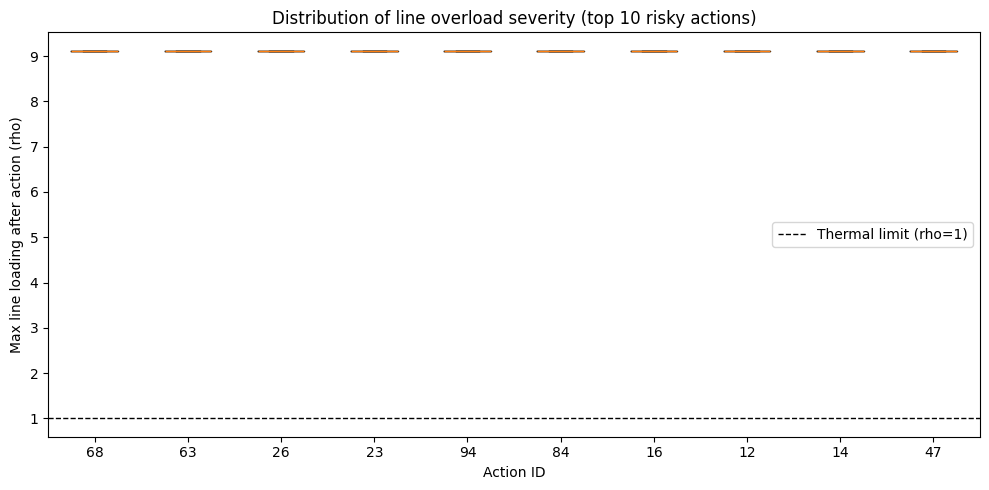

In [20]:
action_cols = [c for c in df.columns if c.startswith("action_")]

# Unpivot to long form for easier filtering
long_df = (
    df.select(action_cols)
      .unpivot(variable_name="action_id", value_name="max_rho")
      .with_columns(
          pl.col("action_id").str.replace("^action_", "").cast(pl.Int32).alias("action_id")
      )
      .to_pandas()
)

# Top 10 actions by median overload
top_actions = (
    long_df.groupby("action_id")["max_rho"]
    .median()
    .sort_values(ascending=False)
    .head(10)
    .index
)
plot_df = long_df[long_df["action_id"].isin(top_actions)]

plt.figure(figsize=(10, 5))
data = [plot_df[plot_df["action_id"] == aid]["max_rho"].values for aid in top_actions]
bp = plt.boxplot(
    data,
    positions=np.arange(len(top_actions))
)
plt.axhline(1.0, color="k", linestyle="--", linewidth=1, label="Thermal limit (rho=1)")
plt.xticks(ticks=np.arange(len(top_actions)), labels=top_actions)
plt.ylabel("Max line loading after action (rho)")
plt.xlabel("Action ID")
plt.title("Distribution of line overload severity (top 10 risky actions)")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
for action in top_actions:
    print(f"Action {action}: {all_actions[action]} \n")

Action 68: This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element(s):
	 	 - Assign bus 2 to line (extremity) id 13 [on substation 12]
	 	 - Assign bus 1 to line (origin) id 14 [on substation 12]
	 - Disconnect the following element(s):
	 	 - Disconnect line (extremity) id 9 [on substation 12]
	 	 - Disconnect load id 9 [on substation 12] 

Action 63: This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - Force disconnection of 1 powerlines ([18])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration 

Action 26: This action will:
	 - NOT change anything to

## 3. Visualizes the distribution of the best achievable rho over all actions for a state

In [22]:
targets = df_targets.to_numpy()
best_action = np.min(targets, axis=1)
finite_mask = np.isfinite(best_action)
best_action = best_action[finite_mask]

best_action[:5]

array([0.86188173, 0.8622174 , 0.85619444, 0.85999703, 0.8637035 ],
      dtype=float32)

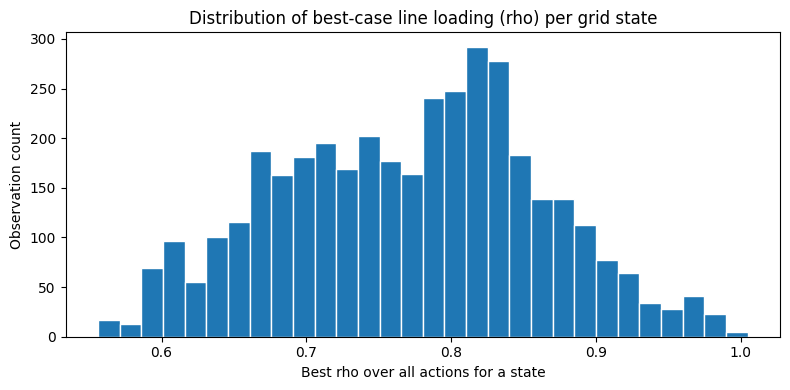

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(best_action, bins=30, edgecolor="white")
ax.set_xlabel("Best rho over all actions for a state")
ax.set_ylabel("Observation count")
ax.set_title("Distribution of best-case line loading (rho) per grid state")

fig.tight_layout()